Aluno: Eduardo Fontes Baltazar da Silveira

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image_path = "aviao_ed.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [5]:
moments = cv2.moments(binary_image)

a) Área do objeto

In [6]:
area = moments['m00']

b) Centróide

In [7]:
centroid_x = moments['m10'] / area
centroid_y = moments['m01'] / area

 c) Momento central e matriz de inércia

In [8]:
mu20 = moments['mu20']
mu02 = moments['mu02']
mu11 = moments['mu11']
inertia_matrix = np.array([[mu20, mu11], [mu11, mu02]])

d) Elipse equivalente

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(inertia_matrix)
major_axis = 2 * np.sqrt(eigenvalues[0] / area)  
minor_axis = 2 * np.sqrt(eigenvalues[1] / area)  
orientation = 0.5 * np.arctan2(2 * mu11, mu20 - mu02)

e) Orientação do objeto (em graus)

In [10]:
orientation_deg = np.degrees(orientation)

f) Plotar centróide equivalente sobre o objeto na imagem.  

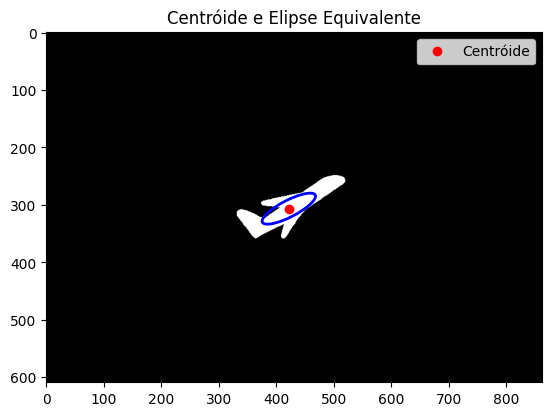

In [11]:
fig, ax = plt.subplots()
ax.imshow(binary_image, cmap='gray')

# Desenhar o centróide
ax.plot(centroid_x, centroid_y, 'ro', label='Centróide')

# Desenhar a elipse
ellipse = plt.matplotlib.patches.Ellipse(
    (centroid_x, centroid_y),
    width=major_axis,
    height=minor_axis,
    angle=orientation_deg,
    edgecolor='blue',
    facecolor='none',
    linewidth=2
)
ax.add_patch(ellipse)

# Adicionar legendas e mostrar
plt.legend()
plt.title("Centróide e Elipse Equivalente")
plt.show()